In [32]:
#Importing libraries....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
#reading csv file using pandas
df=pd.read_csv("Automobile_data.csv")

In [77]:
#checking first 5 rows of dataframe.
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


In [78]:
#checking last 5 rows of dataframe.
df.tail()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
200,-1,volvo,gas,sedan,rwd,109.1,188.8,68.9,55.5,114,5400,28,23,16845
201,-1,volvo,gas,sedan,rwd,109.1,188.8,68.8,55.5,160,5300,25,19,19045
202,-1,volvo,gas,sedan,rwd,109.1,188.8,68.9,55.5,134,5500,23,18,21485
203,-1,volvo,diesel,sedan,rwd,109.1,188.8,68.9,55.5,106,4800,27,26,22470
204,-1,volvo,gas,sedan,rwd,109.1,188.8,68.9,55.5,114,5400,25,19,22625


In [79]:
#checking no-null values and their count and type of all columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   symboling     205 non-null    int64  
 1   make          205 non-null    object 
 2   fuel-type     205 non-null    object 
 3   body-style    205 non-null    object 
 4   drive-wheels  205 non-null    object 
 5   wheel-base    205 non-null    float64
 6   length        205 non-null    float64
 7   width         205 non-null    float64
 8   height        205 non-null    float64
 9   horsepower    205 non-null    int64  
 10  peak-rpm      205 non-null    int64  
 11  highway-mpg   205 non-null    int64  
 12  city-mpg      205 non-null    int64  
 13  price         205 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB


In [80]:
#getting  summary statistics of dataframe
df.describe()

,symboling,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,104.936585,5127.804878,30.751220,25.219512,13476.258537
std,1.245307,6.021776,12.337289,2.145204,2.443522,40.609702,478.414007,6.886443,6.542142,8114.166248
min,-2.000000,86.600000,141.100000,60.300000,47.800000,48.000000,4150.000000,16.000000,13.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,70.000000,4800.000000,25.000000,19.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,95.000000,5200.000000,30.000000,24.000000,10595.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,116.000000,5500.000000,34.000000,30.000000,16558.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,288.000000,6600.000000,54.000000,49.000000,45400.000000


In [81]:
#checking which columns are of numerical type 
set(df._get_numeric_data().columns)

{'city-mpg',
 'height',
 'highway-mpg',
 'horsepower',
 'length',
 'peak-rpm',
 'price',
 'symboling',
 'wheel-base',
 'width'}

In [82]:
#checking which columns are of categorical data type
categorical_features=set(df.columns)-set(df._get_numeric_data().columns)
categorical_features

{'body-style', 'drive-wheels', 'fuel-type', 'make'}

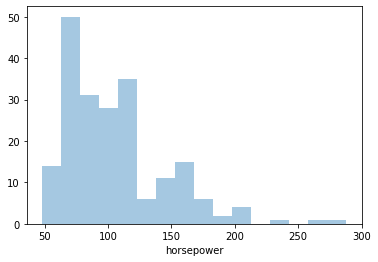

In [118]:
#Checking Numerical features in Univariate variables
#Histogram
# identifying a few variables of interest and checking their distribution.
x = df.horsepower
sns.distplot(x, kde=False)



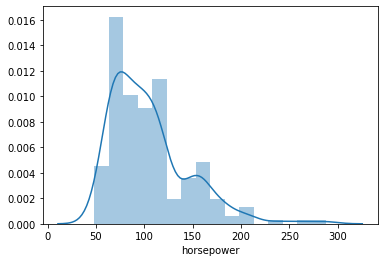

In [119]:
# In order to make any prediction we need to fit a linear regression model, so we made sure the distribution of the variables is almost linear.
#Checking is there any skewness in distribution and outliers are present

sns.distplot(x)


In [120]:
# above plot looking like positively skewed
#if we remove the outliers I think it might become perfect fit for linear model
# So i will use IQR method to find outliers.


In [121]:
# Five Number Rule:
#  minimum (min)
#  first quartile (q1)
#  median (med) 
#  third quartile (q3)
#  maximum (max)




#median(med)
med=x.median()

#first quartile(q1)
q1=x.quantile(0.25)

#third quartile(q3)
q3=x.quantile(0.75)

# Interquartile range(iqr)= q3 -q1
iqr = q3 -q1

#maximum(max)= q3 + 1.5* iqr
max= q3 + 1.5*iqr

#minimum (min)= q1- 1.5*iqr
min=q1-1.5*iqr

In [122]:
#checking no of outliers
df[x>max].count()

horsepower    7
dtype: int64

In [123]:
#It seems there are 7 outliers above the maximum
#now checking below minimum 
df[x<min].count()

horsepower    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0xe699548>,
 'caps': [<matplotlib.lines.Line2D at 0xe6a9d08>,
 'boxes': [<matplotlib.lines.Line2D at 0xe6a1fc8>],
 'medians': [<matplotlib.lines.Line2D at 0xe6b0c88>],
 'fliers': [<matplotlib.lines.Line2D at 0xe6b0d88>],
 'means': []}

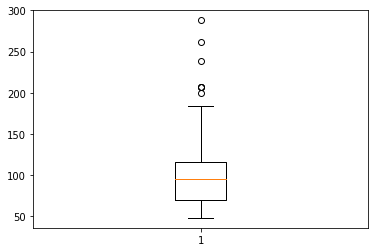

In [124]:
#Using IQR it shows there are no outliers are there.


#another way of checking outliers is box and whiskar plot

plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x18a81ec8>,
 'caps': [<matplotlib.lines.Line2D at 0x18a9cfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18a813c8>],
 'medians': [<matplotlib.lines.Line2D at 0x18a9df88>],
 'fliers': [<matplotlib.lines.Line2D at 0x189f4988>],
 'means': []}

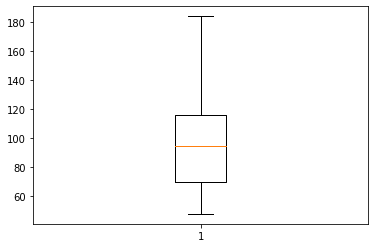

In [141]:
#handling outliers
df=df[x<=max]
#Now there are no outliers
#just take a look
plt.boxplot(df.horsepower)


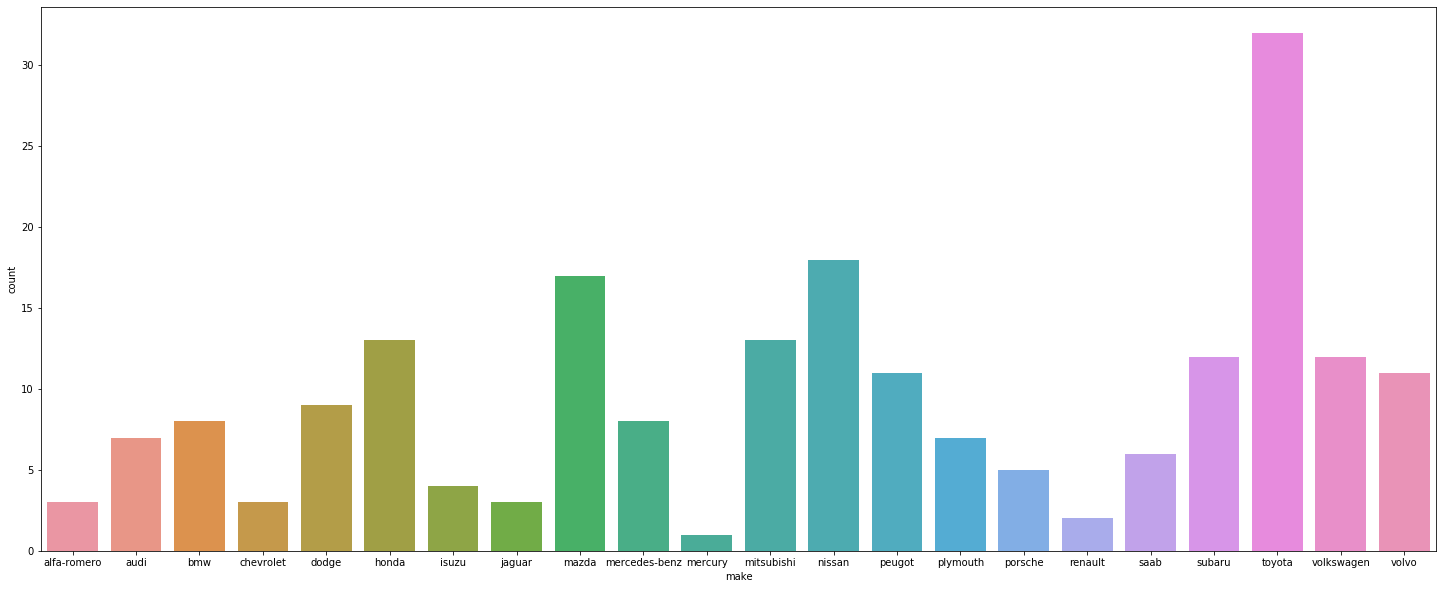

In [154]:
#Categorical features in univariate variables
#we will use COUNTPLOTS for plotting categorical features
#again importing csv because i already used df variable
df=pd.read_csv('Automobile_data.csv')
plt.figure(figsize=(25,10))
sns.countplot(df['make'])

#plot shows the counts of observations in each categorical bin using bars


In [ ]:
# If anything I have missed In EDA- Univariate analysis.
# please comment me.